<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-12-24 13:15:12--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.08s   

2024-12-24 13:15:12 (39.4 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [4]:
df_ = pd.read_csv('AirlineTweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df = df_[['airline_sentiment', 'text']].copy()
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

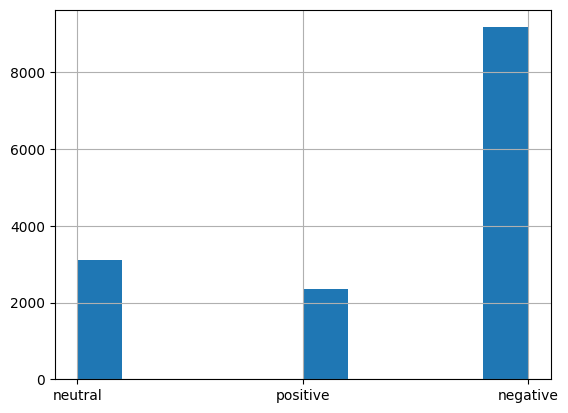

In [6]:
df['airline_sentiment'].hist()

In [7]:
target_map = {'positive': 1, 'neutral': 0, 'negative': 2}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,0
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,0
3,negative,@VirginAmerica it's really aggressive to blast...,2
4,negative,@VirginAmerica and it's a really big bad thing...,2


In [8]:
df_train, df_test = train_test_split(df)
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,2
1989,negative,@united The engineer that designed the 787 doo...,2
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",2
1711,negative,@united ouch not fair,2
11542,negative,@USAirways stuck in cae need reFlight Booking ...,2


In [9]:
vectorize = TfidfVectorizer(max_features=2000)

In [10]:
X_train = vectorize.fit_transform(df_train['text'])
X_test = vectorize.transform(df_test['text'])

In [11]:
Y_train = df_train['target']
Y_test = df_test['target']

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print('Train', model.score(X_train, Y_train))
print('Test', model.score(X_test, Y_test))

Train 0.8551001821493625
Test 0.7978142076502732


In [14]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print('Train', roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print('Test', roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train 0.9427155214535131
Test 0.8953675693826142


In [15]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
print('Train', f1_score(Y_train, P_train, average='micro'))
print('Test', f1_score(Y_test, P_test, average='micro'))

Train 0.8551001821493625
Test 0.7978142076502732


In [16]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.64731183, 0.05075269, 0.30193548],
       [0.10124434, 0.69852941, 0.20022624],
       [0.0262814 , 0.00827646, 0.96544214]])

<Axes: >

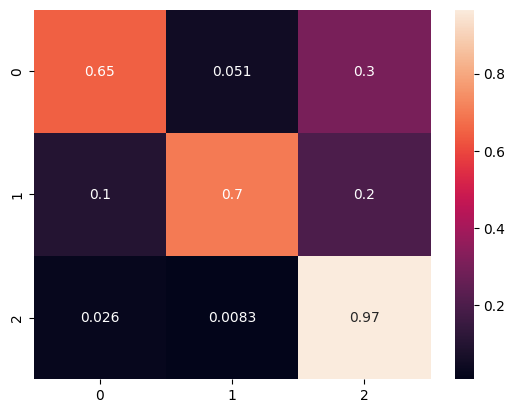

In [17]:
# show confusion matrix with seaborn
sn.heatmap(cm, annot=True)

In [18]:
def plot_cm(cm):
  classes = ['negative', 'neutral', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, cmap='Blues')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

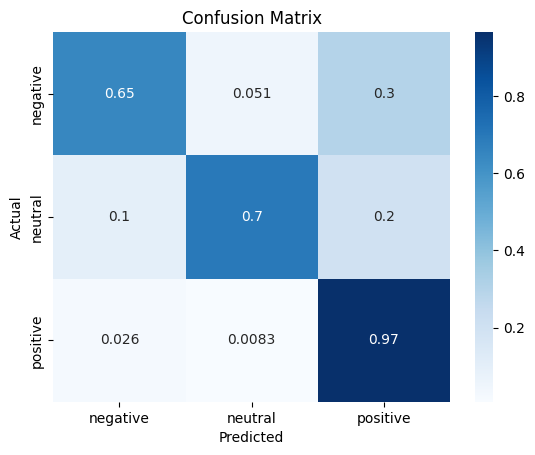

In [19]:
plot_cm(cm)

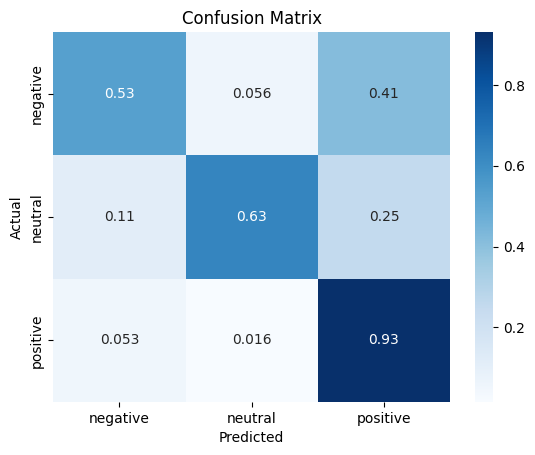

In [20]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)